Q1. Explain GET and POST methods.

Ans.<br>


**GET and POST** are two HTTP methods used to request and send data to a web server. They are commonly used in web applications to perform different types of operations.

1. **GET Method**:
   - GET requests are used to retrieve data from the server.
   - They are typically used for safe and idempotent operations, meaning they should not have any side effects on the server.
   - Data is sent as part of the URL, typically in the query parameters.
   - GET requests are limited in the amount of data they can send, as the data is included in the URL.

   Here's an example in Python using the `requests` library to make a GET request:

```python
import requests

url = "https://example.com/api/data"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()  # Assuming the response contains JSON data
    print(data)
else:
    print(f"Error: {response.status_code}")
```

2. **POST Method**:
   - POST requests are used to submit data to the server to create or update a resource.
   - They are typically used for operations that may have side effects on the server.
   - Data is sent in the request body, which allows for larger data payloads compared to GET requests.
   
   Here's an example in Python using the `requests` library to make a POST request:

```python
import requests

url = "https://example.com/api/create"
data = {
    "name": "John Doe",
    "email": "john@example.com"
}

response = requests.post(url, json=data)

if response.status_code == 201:
    created_data = response.json()  # Assuming the response contains JSON data
    print("Resource created:", created_data)
else:
    print(f"Error: {response.status_code}")
```

In the example above, we send a POST request to create a new resource on the server and include data in JSON format in the request body.

Q2. Why is request used in Flask?

Ans. <br>

In Flask, the `request` object is used to access data that the client (typically a web browser) sends to the server as part of an HTTP request. It provides a way for Flask applications to retrieve information from the client, such as form data, URL parameters, headers, and more. The `request` object is a critical component for handling user input and interaction in web applications. Here are some common use cases for the `request` object in Flask:

1. **Accessing Form Data**: When a user submits an HTML form on a web page, the data entered into the form fields is sent to the server. Flask uses the `request` object to access this data, making it available for processing. You can use `request.form` to access form data, which is often useful for user registration, login, and submitting data to the server.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/login', methods=['POST'])
   def login():
       username = request.form.get('username')
       password = request.form.get('password')
       # Check username and password, perform authentication, etc.
       # ...
   ```

2. **Query Parameters**: The `request` object can also be used to access query parameters from the URL. Query parameters are typically used for filtering or providing additional information in the URL.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/search')
   def search():
       query = request.args.get('query')
       # Use the query parameter to perform a search operation
       # ...
   ```

3. **Accessing Headers**: You can use `request.headers` to access the HTTP headers sent by the client, which may contain important information such as authentication tokens, user agent details, or content types.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/user-agent')
   def user_agent():
       user_agent = request.headers.get('User-Agent')
       # Use the User-Agent header for further processing
       # ...
   ```

4. **Handling File Uploads**: In cases where users need to upload files to the server, Flask uses the `request` object to access and handle file uploads.

   ```python
   from flask import Flask, request

   app = Flask(__name__)

   @app.route('/upload', methods=['POST'])
   def upload():
       uploaded_file = request.files.get('file')
       # Process the uploaded file, save it, or perform other operations
       # ...
   ```

The `request` object is a fundamental part of handling client-server interactions in Flask applications, allowing you to extract and work with data provided by users and clients. It provides a convenient way to access various aspects of an HTTP request, making it essential for building dynamic and interactive web applications.

Q3. Why is redirect() used in Flask?

Ans.<br>
In Flask, the `redirect()` function is used to perform a HTTP redirect, which instructs the client's web browser to navigate to a different URL. Redirects are an essential feature in web applications for several reasons:

1. **Navigation**: Redirects allow you to guide users to different pages or routes within your web application. This is helpful for creating a smooth and intuitive user experience by automatically sending users to the appropriate page after they have completed an action or submitted a form.

2. **Changing URLs**: You can use redirects to change the URL displayed in the user's browser. This can be useful for creating clean and user-friendly URLs or for handling URL changes during application refactoring or maintenance.

3. **Handling Form Submissions**: After a user submits a form, it's a common practice to redirect them to a different URL to prevent accidental form resubmissions when users refresh the page. This pattern is known as the "Post/Redirect/Get" (PRG) pattern.

4. **Authentication and Authorization**: Redirects can be used to send unauthenticated users to a login page and then redirect them back to their originally requested page after successful authentication. Similarly, redirects can be used to control access to specific routes based on user authorization.

Here's a simple example of how to use the `redirect()` function in Flask:

```python
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def home():
    return 'Welcome to the home page'

@app.route('/about')
def about():
    return 'This is the about page'

@app.route('/redirect_example')
def redirect_example():
    # Redirect the user from '/redirect_example' to the '/about' route
    return redirect(url_for('about'))

if __name__ == '__main__':
    app.run()
```

In the above example, when a user visits `/redirect_example`, they are redirected to the `/about` route using `redirect()`. This allows you to control the flow of your web application and guide users to different parts of your site based on their actions or the logic of your application.

In summary, the `redirect()` function in Flask is a powerful tool for managing the flow of web applications by sending users to different URLs and providing a better user experience.

Q4. What are templates in Flask? Why is the render_template() function used?

Ans. <br>
In Flask, templates are a fundamental component of the framework's support for building web applications with dynamic content. Templates in Flask are essentially HTML files with placeholders for dynamic data that you want to insert into the HTML structure. These placeholders are typically populated with data from your Python code to create dynamic web pages.

Templates are beneficial for several reasons:

1. **Separation of Concerns**: Templates allow you to separate the presentation layer (HTML structure) from the application logic (Python code). This separation follows the principle of "separation of concerns," making your codebase cleaner, more maintainable, and easier to collaborate on with front-end developers.

2. **Dynamic Content**: Templates enable you to display dynamic content generated by your Flask application. You can insert variables, loops, conditionals, and other Python logic directly into the HTML template to generate web pages with dynamic data.

3. **Reusability**: Templates can be reused across multiple routes or pages, reducing code duplication and ensuring a consistent look and feel throughout your web application.

The `render_template()` function in Flask is used to render HTML templates. It takes the name of the template file as an argument and can also pass data (variables) to the template for rendering. Here's how you can use it:

```python
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    # Pass a variable to the template
    greeting = "Hello, Flask!"
    return render_template('index.html', greeting=greeting)

if __name__ == '__main__':
    app.run()
```

In this example, the `render_template()` function is used to render the `index.html` template. The `greeting` variable is also passed to the template so that it can be inserted into the HTML structure dynamically.

Here's a simplified example of what an `index.html` template might look like:

```html
<!DOCTYPE html>
<html>
<head>
    <title>Flask Template Example</title>
</head>
<body>
    <h1>{{ greeting }}</h1>
</body>
</html>
```

In the HTML template, you can see the `{{ greeting }}` placeholder. This is where the value of the `greeting` variable from the Python code will be inserted when the template is rendered.

The `render_template()` function, combined with templates, allows you to create dynamic and data-driven web pages in Flask, making it easier to build complex web applications while maintaining clean and organized code.

Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

Ans.<br>
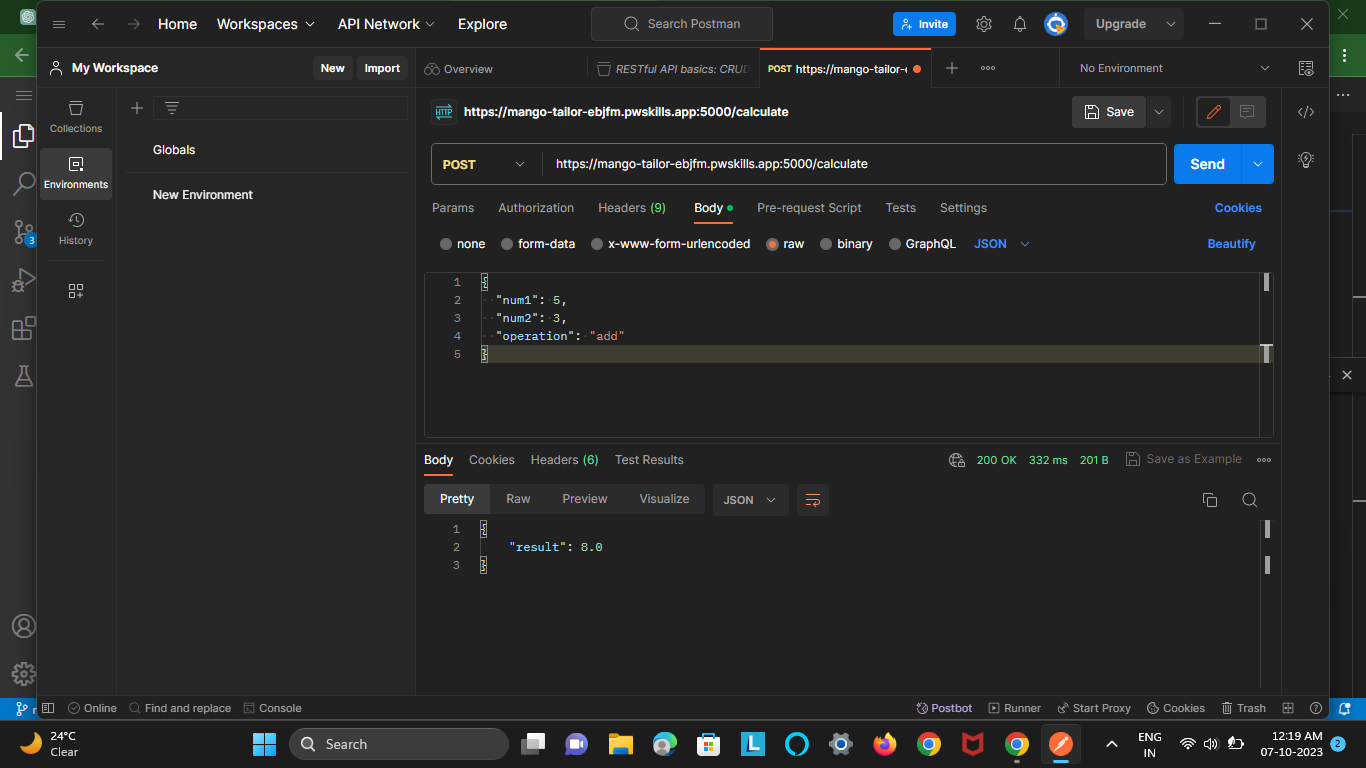
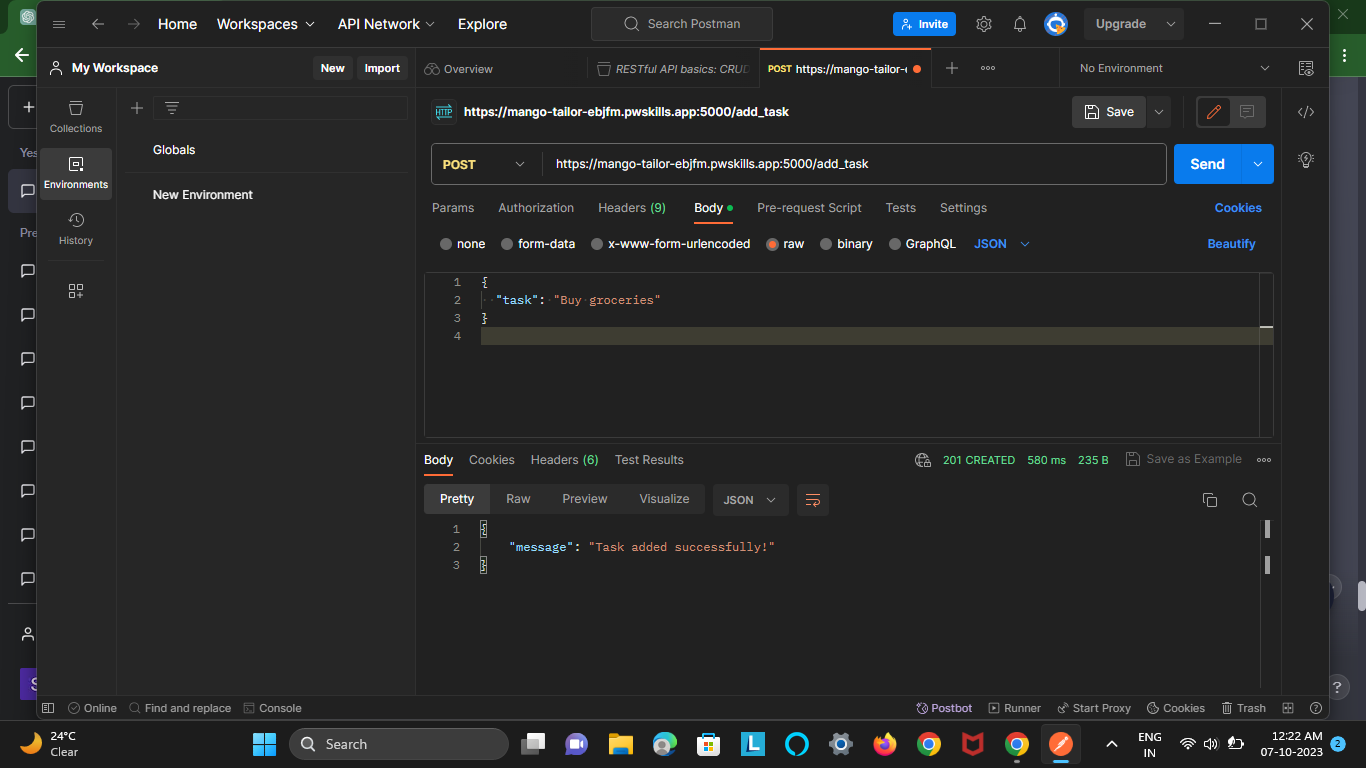